<a href="https://colab.research.google.com/github/marianaadmc/TFG-Procesamiento-de-imagenes-de-fluorescencia-FISH-/blob/main/Watershed_two_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install opencv-python-headless

In [1]:
from skimage import filters, io, color, img_as_ubyte
import matplotlib.pyplot as plt
from math import floor
import numpy as np
from skimage.color import rgb2gray
from PIL import Image
import cv2
from skimage.measure import regionprops, label
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [2]:
image0161 = io.imread('image0161.jpg')
image2472 = io.imread('image2472.jpg')
image2949 = io.imread('image2949.jpg')

# Preprocesamiento de la imagen

In [3]:
image0161_gris = rgb2gray(image0161)
image2472_gris = rgb2gray(image2472)
image2949_gris = rgb2gray(image2949)

# MC-Watershed

### Umbral Otsu vs Li

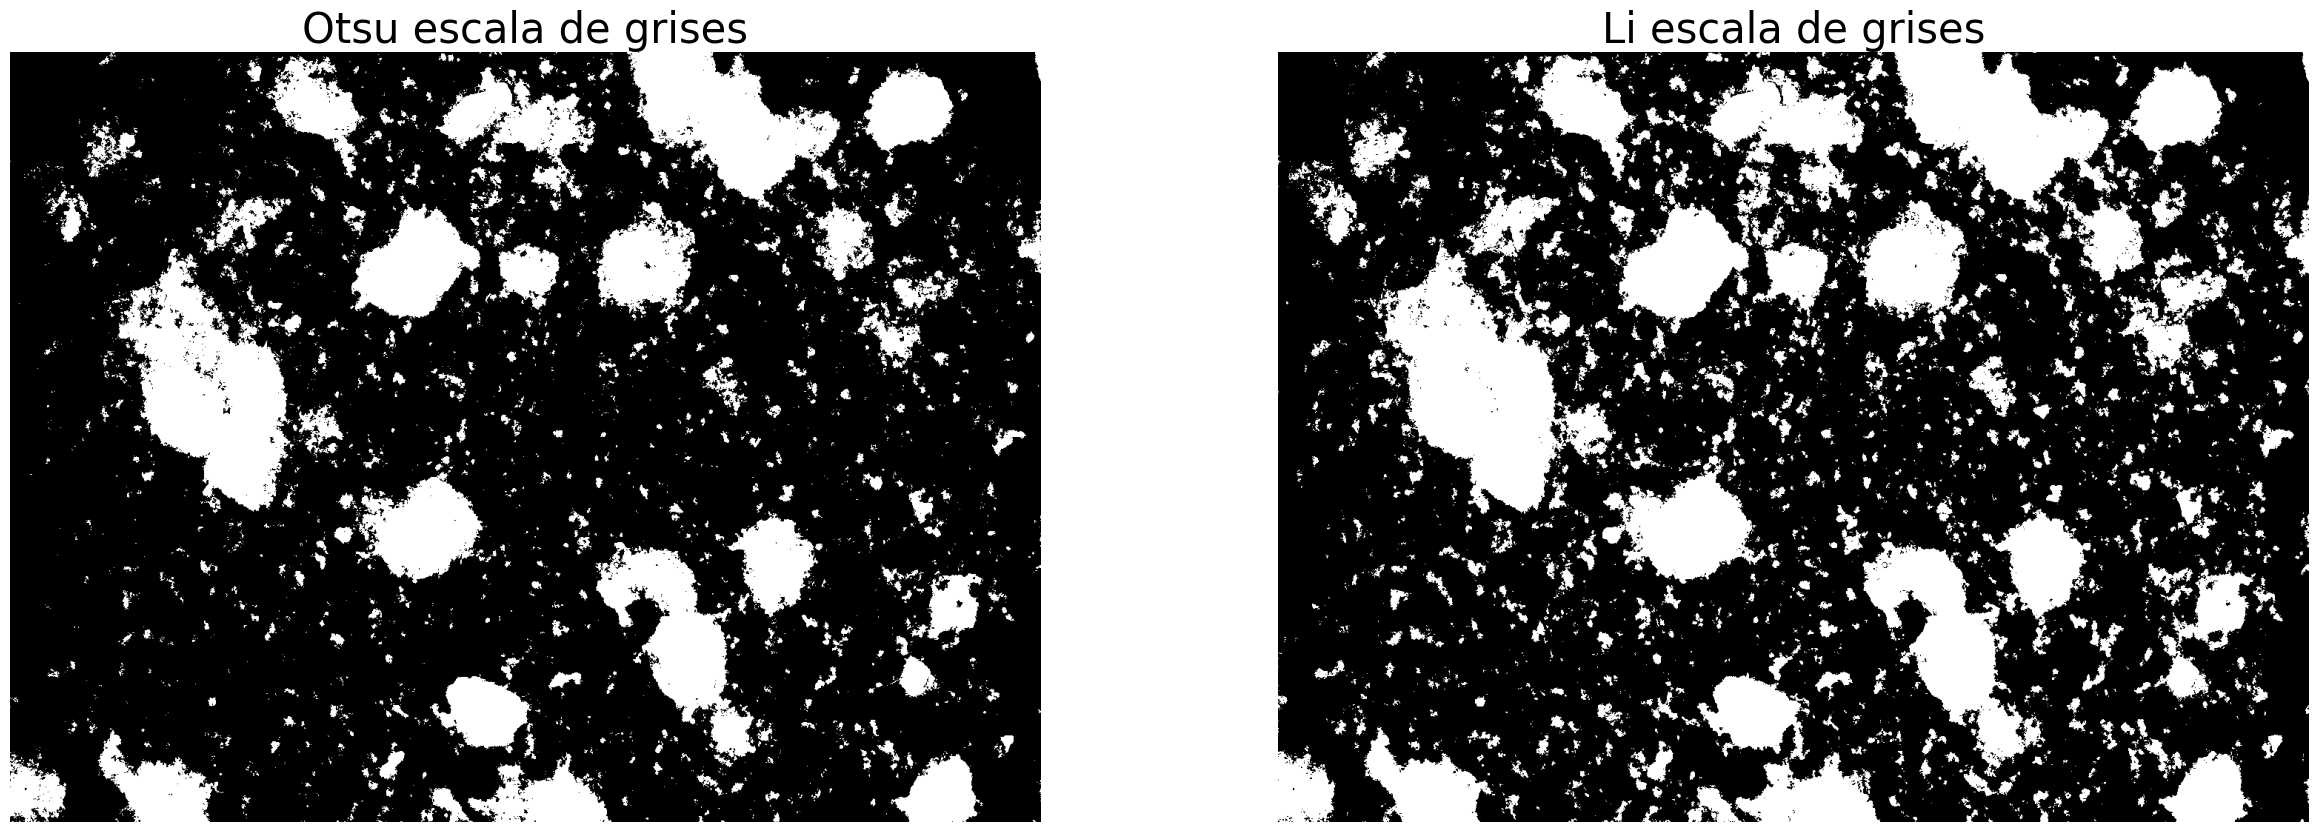

In [4]:
umbral_otsu0161 = filters.threshold_otsu(image0161_gris)
otsu0161 = image0161_gris > umbral_otsu0161

umbral_li0161 = filters.threshold_li(image0161_gris)
li0161 = image0161_gris > umbral_li0161

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 10))
ax[0].imshow(otsu0161, cmap = "gray")
ax[0].set_title("Otsu escala de grises", fontsize=30)

ax[1].imshow(li0161, cmap = "gray")
ax[1].set_title("Li escala de grises", fontsize=30)

for a in ax:
    a.axis('off')

plt.show()

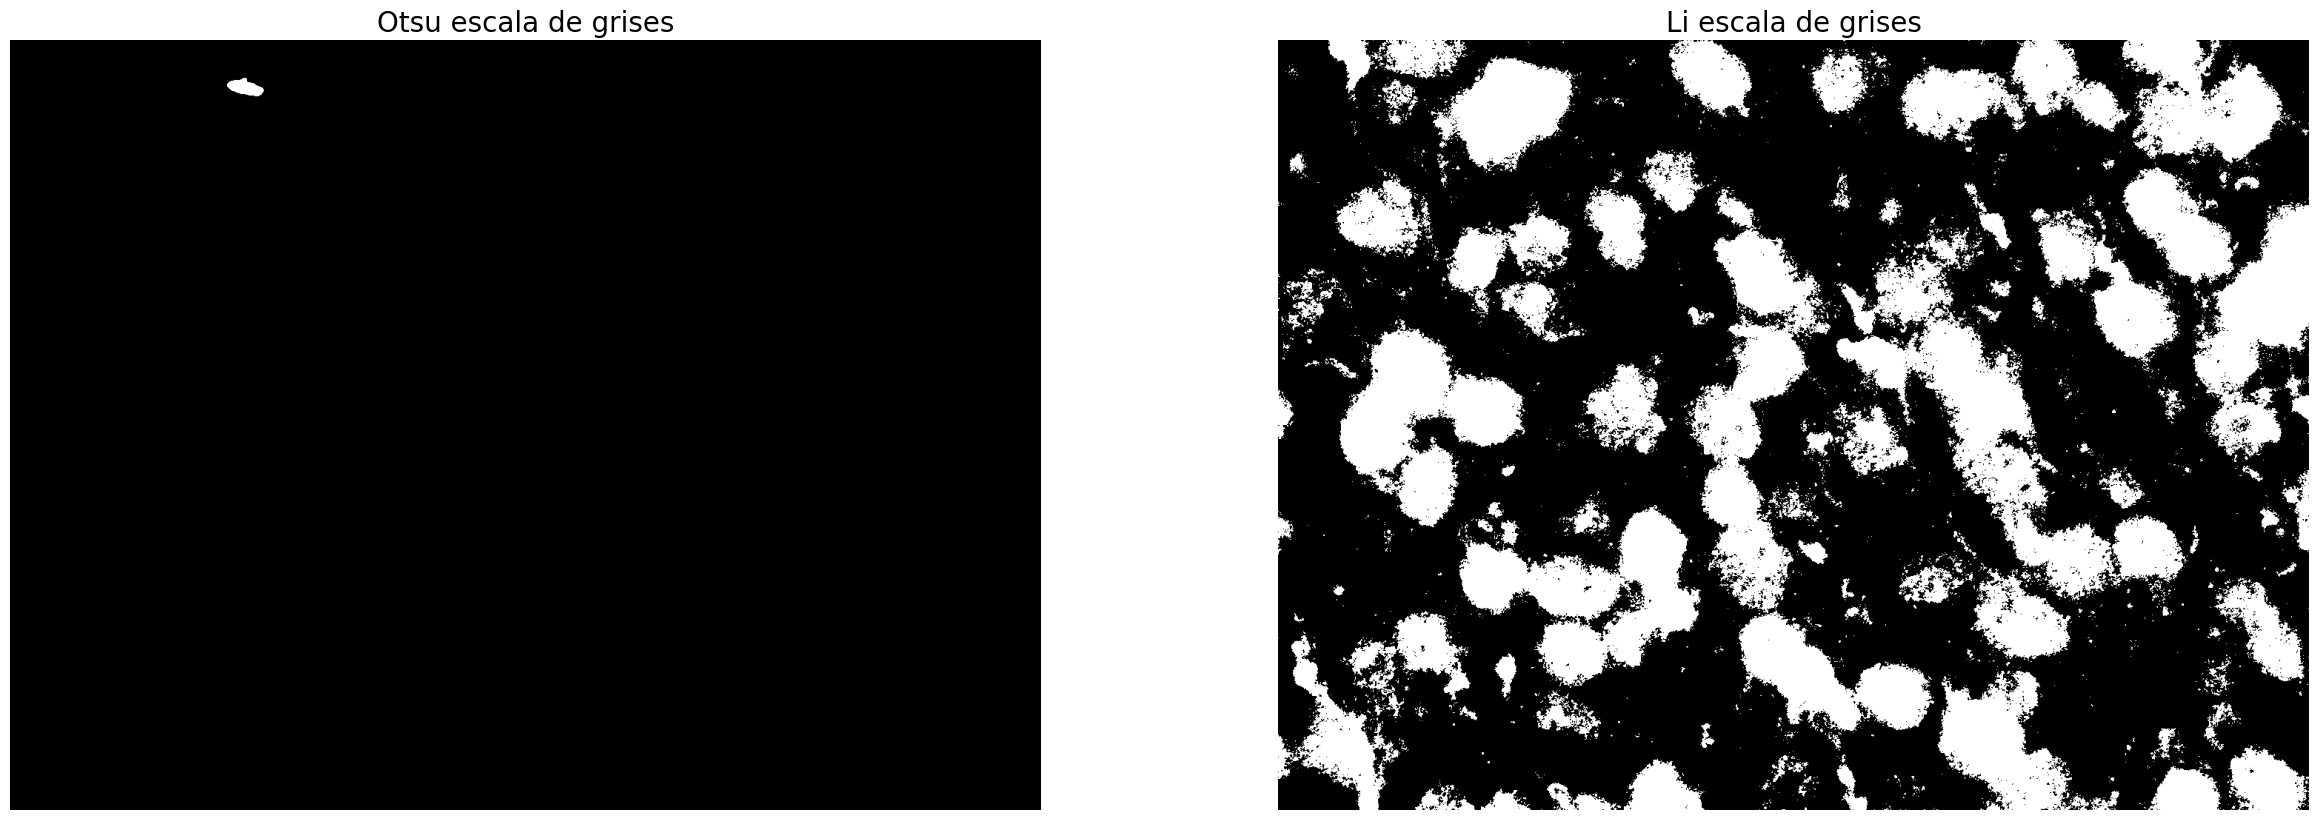

In [5]:
umbral_otsu2472 = filters.threshold_otsu(image2472_gris)
otsu2472 = image2472_gris > umbral_otsu2472

umbral_li2472 = filters.threshold_li(image2472_gris)
li2472 = image2472_gris > umbral_li2472

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 10))
ax[0].imshow(otsu2472, cmap = "gray")
ax[0].set_title('Otsu escala de grises', fontsize=20)

ax[1].imshow(li2472, cmap = "gray")
ax[1].set_title('Li escala de grises', fontsize=20)

for a in ax:
    a.axis('off')

plt.show()

image2472_bin = np.zeros(li2472.shape)
for x in range(0, li2472.shape[0]):
  for y in range(0, li2472.shape[1]):
    if li2472[x][y] == True:
      image2472_bin[x][y] = 1


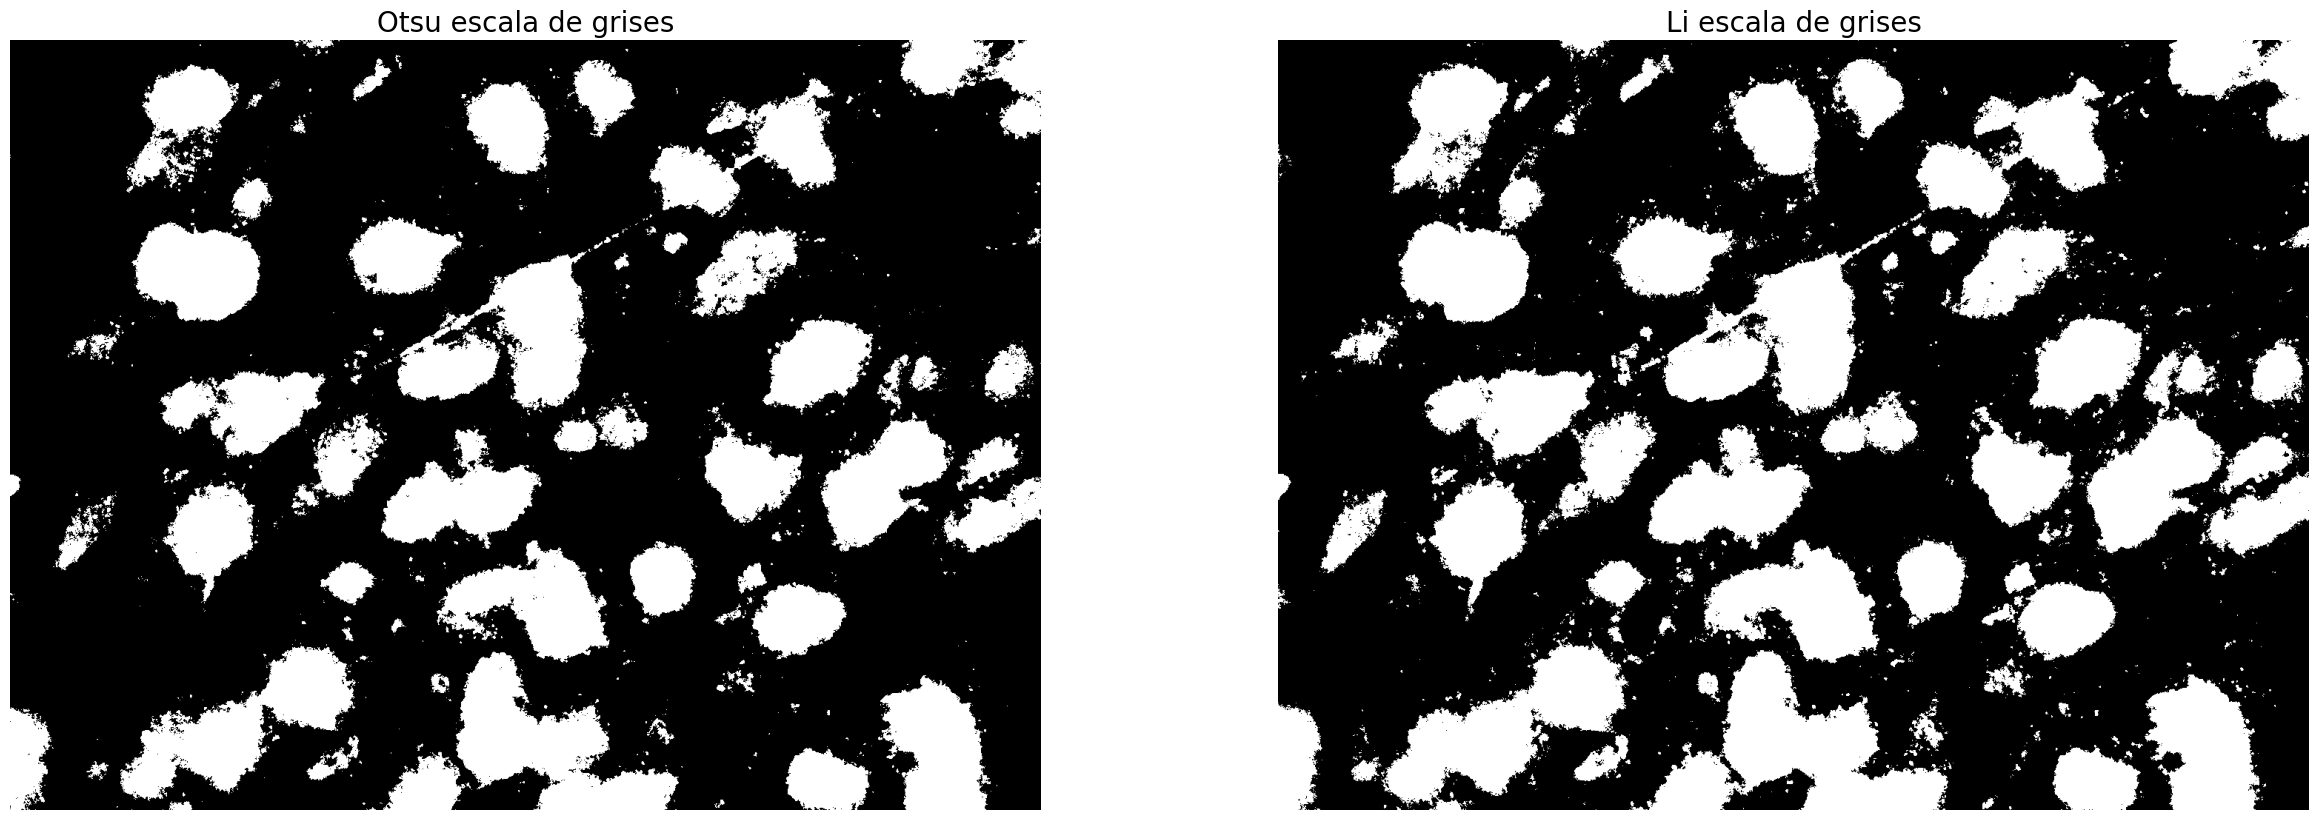

In [6]:
umbral_otsu2949 = filters.threshold_otsu(image2949_gris)
otsu2949 = image2949_gris > umbral_otsu2949

umbral_li2949 = filters.threshold_li(image2949_gris)
li2949 = image2949_gris > umbral_li2949

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 10))
ax[0].imshow(otsu2949, cmap = "gray")
ax[0].set_title('Otsu escala de grises', fontsize=20)

ax[1].imshow(li2949, cmap = "gray")
ax[1].set_title('Li escala de grises', fontsize=20)

for a in ax:
    a.axis('off')

plt.show()

Como nos interessa un método lo más general posible, el método de umbralización Li es el más favorable ya que Otsu no ofrece resultados en una de las imágenes.

### Fuzzy-c-means

In [7]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=4ed1a333e57dd9a50ed53b00bf5aca417e13f318b1cdd1cdfc7c763b5c9efa18
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [8]:
import skfuzzy
from skfuzzy import membership as mf
from skfuzzy import image as img

def fuzzy_cmeans(img, n_grupos, n_iter):
    img_array = np.array(img)

    data = img_array.reshape((-1, 3))
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(
        data.T, n_grupos, 4, error=0.005, maxiter=n_iter, init=None)


    return u

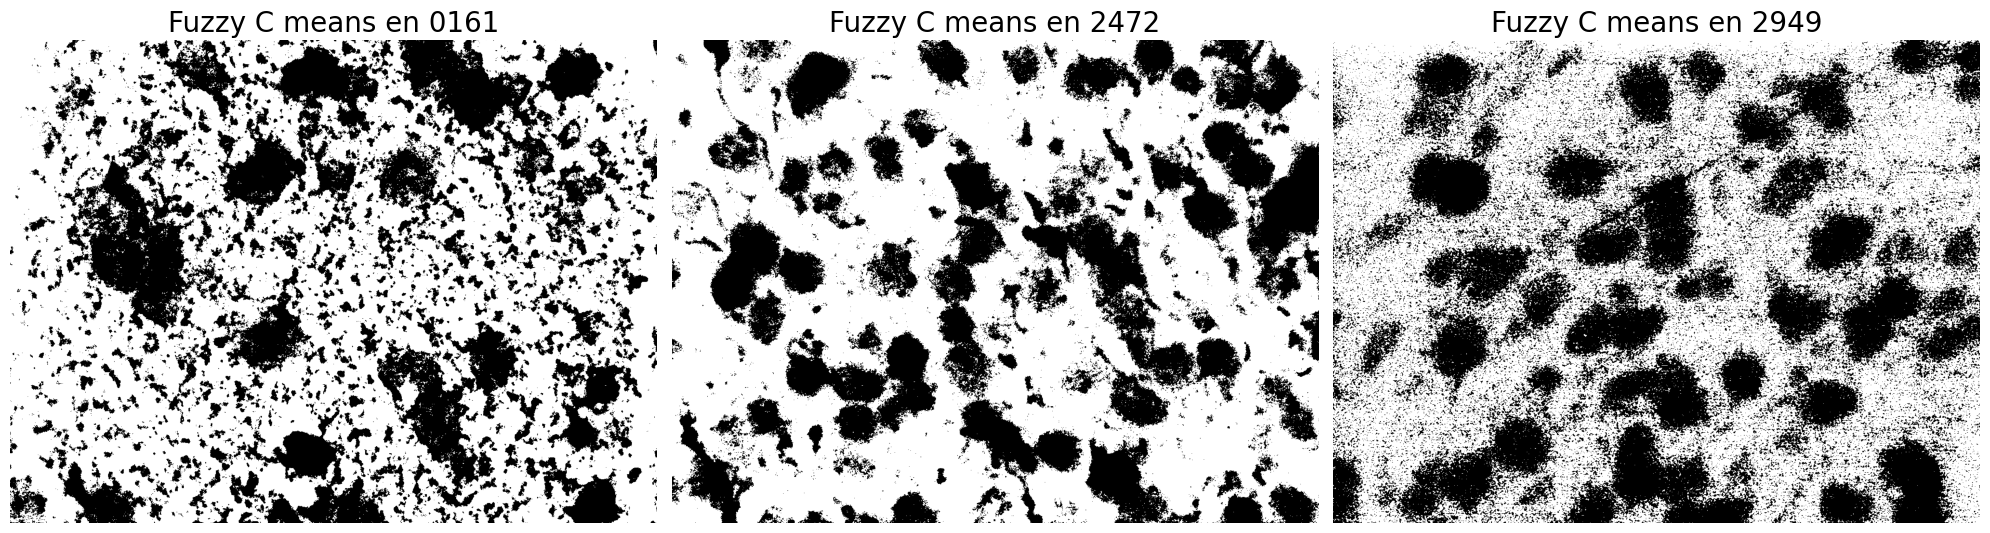

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

cmeans0161 = fuzzy_cmeans(image0161, 2, 50)
ax[0].imshow(np.uint8(np.argmax(cmeans0161, axis=0).reshape(image0161_gris.shape[0], image0161_gris.shape[1])), cmap = "gray")
ax[0].set_title('Fuzzy C means en 0161', fontsize=20)

cmeans2472 = fuzzy_cmeans(image2472, 2, 50)
ax[1].imshow(np.uint8(np.argmax(cmeans2472, axis=0).reshape(image2472_gris.shape[0], image2472_gris.shape[1])), cmap = "gray")
ax[1].set_title('Fuzzy C means en 2472', fontsize=20)

cmeans2949 = fuzzy_cmeans(image2949, 2, 50)
ax[2].imshow(np.uint8(np.argmax(cmeans2949, axis=0).reshape(image2949_gris.shape[0], image2949_gris.shape[1])), cmap = "gray")
ax[2].set_title('Fuzzy C means en 2949', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

Propiedades de las regiones:
Región 1: Área = 2344, BoundingBox = (0, 68, 72, 141)
Región 3: Área = 3865, BoundingBox = (0, 141, 53, 255)
Región 5: Área = 7376, BoundingBox = (0, 528, 104, 640)
Región 10: Área = 9402, BoundingBox = (0, 989, 124, 1150)
Región 11: Área = 22061, BoundingBox = (0, 1138, 166, 1361)
Región 51: Área = 3972, BoundingBox = (18, 720, 100, 797)
Región 60: Área = 17145, BoundingBox = (21, 206, 176, 399)
Región 101: Área = 10218, BoundingBox = (34, 840, 139, 1010)
Región 168: Área = 758, BoundingBox = (53, 141, 93, 185)
Región 427: Área = 3705, BoundingBox = (149, 492, 234, 577)
Región 445: Área = 333, BoundingBox = (153, 16, 180, 38)
Región 512: Área = 12603, BoundingBox = (172, 1140, 331, 1291)
Región 575: Área = 358, BoundingBox = (184, 1291, 204, 1325)
Región 577: Área = 7344, BoundingBox = (185, 77, 288, 207)
Región 599: Área = 1399, BoundingBox = (193, 927, 282, 991)
Región 623: Área = 5704, BoundingBox = (201, 413, 311, 499)
Región 657: Área = 516, BoundingB

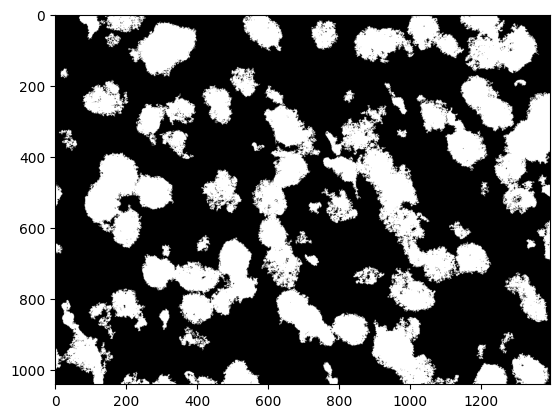

In [14]:
min_area = 300
label_image = label(image2472_bin)
regions = regionprops(label_image)
bw_filtered = np.zeros_like(image2472_bin)
for region in regions:
    if min_area <= region.area:
        bw_filtered[label_image == region.label] = 1

plt.imshow(bw_filtered, cmap = 'gray')

props = regionprops(label_image)
print("Propiedades de las regiones:")
for i, prop in enumerate(props):
    if prop.area > 300 and image2472_bin[int(prop.centroid[0])][int(prop.centroid[1])] == 1:
      print(f"Región {i + 1}: Área = {prop.area}, BoundingBox = {prop.bbox}")


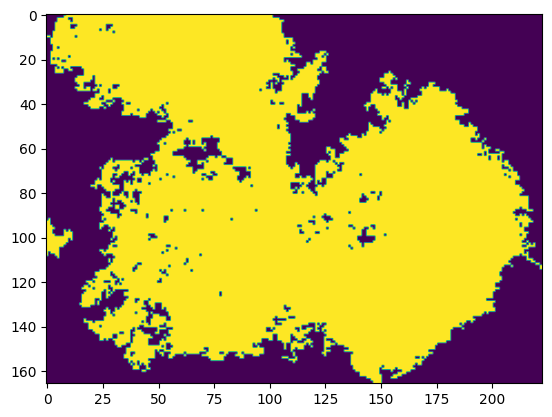

In [17]:
reg = bw_filtered[0:166, 1138:1361]
plt.imshow(reg)

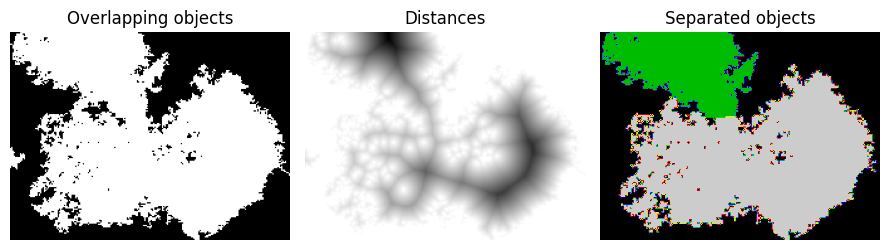

In [20]:
distance = ndi.distance_transform_edt(reg)
coords = peak_local_max(distance.astype(int), footprint=np.ones((210, 210)), labels=reg.astype(int))
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=reg)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(reg, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()